# 1 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!cd /content/drive/MyDrive/2021-한양대3학년/

In [2]:
from google.colab import files

# 로컬 파일을 colab으로 업로드
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])
  ))

Saving NHIS_OPEN_GJ_2016_v1.csv to NHIS_OPEN_GJ_2016_v1.csv


KeyboardInterrupt: ignored

In [11]:
cd /content/drive/MyDrive/2021-한양대3학년

/content/drive/MyDrive/2021-한양대3학년


In [13]:
ls

 자람튜터1학기/             linearregression.ipynb
 1학기/                     NHIS_OPEN_GJ_2016.csv
'#16 CSS 최종보고서.pptx'   ResNet_Sheep/
 C4.pptx                    VGG_MNIST/
 data/                     '코딩원격 진도차트 안태연.xls'
 Lenet/                    '코딩원격 진도차트 김성훈.xls'
 LeNet_DATALOADER/


데이터 확인하기

In [12]:
import pandas as pd
import io

# csv 파일 읽어오기
dataFrame = pd.read_csv(('NHIS_OPEN_GJ_2016_v1.csv'), encoding='CP949', engine="python")

# 데이터 모양 확인
print("dataFrame.shape : ", dataFrame.shape)
print(dataFrame.columns)

dataFrame.shape :  (1000000, 34)
Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')


In [ ]:
# 첫 5개 데이터 확인
dataFrame[:5]

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2016,1,1,10,27,175.0,75.0,86.0,1.0,1.2,1.0,1.0,140.0,90.0,91.0,263.0,196.0,46.0,177.0,16.0,1.0,0.9,27.0,30.0,45.0,3.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
1,2016,2,2,11,41,160.0,65.0,85.0,1.5,1.2,1.0,1.0,138.0,80.0,105.0,185.0,262.0,35.0,122.0,13.1,1.0,0.9,18.0,17.0,19.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
2,2016,3,2,11,43,150.0,55.0,80.0,1.5,1.5,1.0,1.0,138.0,88.0,93.0,246.0,186.0,59.0,150.0,13.6,1.0,0.7,23.0,19.0,64.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
3,2016,4,1,12,48,175.0,70.0,85.0,1.2,1.2,1.0,1.0,124.0,76.0,93.0,179.0,79.0,40.0,123.0,16.8,1.0,1.0,20.0,39.0,69.0,2.0,NaN,1,NaN,NaN,NaN,NaN,1.0,20171219
4,2016,5,2,6,11,160.0,50.0,67.0,0.4,0.5,1.0,1.0,121.0,68.0,96.0,223.0,104.0,72.0,130.0,12.8,1.0,0.7,13.0,7.0,20.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219


# 2 데이터 샘플링 및 시각화하기

특정 열 선택

In [ ]:
# 특정 열(키, 체중) 선택
twoCols = dataFrame.loc[:, ["신장(5Cm단위)", "체중(5Kg단위)"]]

# 키와 몸무게 중에 NaN 값이 있는 행 제거
twoCols=twoCols.dropna()

샘플링

In [ ]:
# 데이터를 10 개 샘플링
samples = twoCols.sample(10)

# 샘플 확인
samples

,신장(5Cm단위),체중(5Kg단위)
620212,155.0,45.0
236462,170.0,65.0
829108,165.0,60.0
521194,170.0,70.0
414527,180.0,90.0
388966,165.0,85.0
511472,165.0,70.0
238156,175.0,85.0
626879,160.0,60.0
734698,155.0,45.0


데이터 시각화1

신장: [155.0, 170.0, 165.0, 170.0, 180.0, 165.0, 165.0, 175.0, 160.0, 155.0]
체중: [45.0, 65.0, 60.0, 70.0, 90.0, 85.0, 70.0, 85.0, 60.0, 45.0]


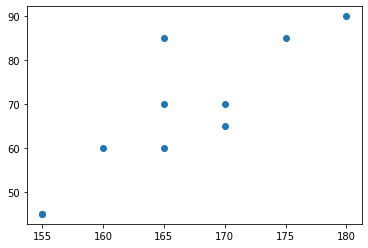

In [ ]:
import matplotlib.pyplot as plt

# 신장
hei=list(samples.iloc[:,0])
print("신장:", hei)
# 체중
wei=list(samples.iloc[:,1])
print("체중:", wei)

# 신장-체중 그래프 그리기
plt.scatter(hei, wei)
plt.show()

시각화2(개수가 많을 수록 원의 반지름 크게)

신장(5Cm단위)  체중(5Kg단위)
120.0      55.0         1
125.0      35.0         1
130.0      30.0         1
           35.0         2
           40.0         1
                       ..
190.0      90.0         1
           95.0         1
           105.0        1
           110.0        1
195.0      105.0        1
Length: 151, dtype: int64


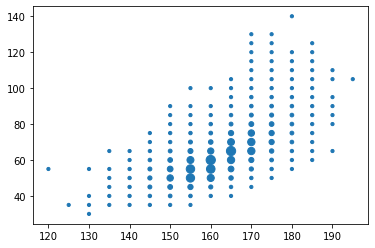

In [ ]:
# 데이터를 10000 개 샘플링
samples = twoCols.sample(10000)

# [신장, 체중] pair 별 개수
grouped = samples.groupby(["신장(5Cm단위)", "체중(5Kg단위)"]).size()
print(grouped)

# 신장-체중 그래프 그리기. 이 때, [신장, 체중] pair 별 개수가 많을 수록 원의 반지름을 크게하여 그림
plt.scatter(x=grouped.index.get_level_values(0), y=grouped.index.get_level_values(1), s=[10*1.005**n for n in grouped.values])
plt.show()

# 3 학습 모델 정의하기

## 3-1 X(키) -> Y(체중)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# 선형회귀 모델 학습에 사용될 변수 정의(학습되며 값이 바뀜)
W = torch.tensor(torch.FloatTensor(1).uniform_(-1, 1), requires_grad=True)
b = torch.tensor(torch.FloatTensor(1).uniform_(-1, 1), requires_grad=True)

# 최적화 방법 정의(확률적 경사 하강법 사용)
optimizer = optim.SGD([W, b], lr=0.0001)

nb_epochs = 2000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):
    samples = twoCols.sample(10000)
    sample_x = samples.iloc[:, 0].values
    sample_y = samples.iloc[:, 1].values

    x_train = torch.FloatTensor(sample_x)
    y_train = torch.FloatTensor(sample_y)

    # 선형회귀 모델(가설) 계산
    hypothesis = x_train * W + b

    # loss 계산
    loss = torch.mean(torch.abs(hypothesis - y_train))

    # loss로 H(x) 개선
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Loss: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), loss.item()
        ))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


Epoch    0/2000 W: 0.609, b: -0.539 Loss: 37.726089
Epoch  100/2000 W: 0.390, b: -0.541 Loss: 8.323406
Epoch  200/2000 W: 0.388, b: -0.541 Loss: 8.343694
Epoch  300/2000 W: 0.388, b: -0.541 Loss: 8.236041
Epoch  400/2000 W: 0.388, b: -0.542 Loss: 8.278455
Epoch  500/2000 W: 0.388, b: -0.542 Loss: 8.296551
Epoch  600/2000 W: 0.389, b: -0.542 Loss: 8.329804
Epoch  700/2000 W: 0.390, b: -0.542 Loss: 8.373130
Epoch  800/2000 W: 0.388, b: -0.542 Loss: 8.283842
Epoch  900/2000 W: 0.390, b: -0.543 Loss: 8.320293
Epoch 1000/2000 W: 0.390, b: -0.543 Loss: 8.333157
Epoch 1100/2000 W: 0.389, b: -0.543 Loss: 8.307032
Epoch 1200/2000 W: 0.390, b: -0.543 Loss: 8.351259
Epoch 1300/2000 W: 0.389, b: -0.543 Loss: 8.342447
Epoch 1400/2000 W: 0.390, b: -0.544 Loss: 8.321810
Epoch 1500/2000 W: 0.387, b: -0.544 Loss: 8.295423
Epoch 1600/2000 W: 0.390, b: -0.544 Loss: 8.275699
Epoch 1700/2000 W: 0.386, b: -0.544 Loss: 8.243073
Epoch 1800/2000 W: 0.389, b: -0.544 Loss: 8.301270
Epoch 1900/2000 W: 0.389, b: -

결과확인

In [ ]:
# 학습된 가중치 확인
print("W:", W.item(), "b: ", b.item())

# 임의의 신장에 대한 체중 예측 결과
height = 170
weight = W * height + b
print(weight.item(), "kg")

W: 0.388440877199173 b:  -0.5449038743972778
65.49004364013672 kg


## 3-2 X[키, 체중] -> Y[허리둘레]

데이터에서 특정 열(키, 체중, 허리둘레) 선택

In [ ]:
# dataFrame = pd.read_csv(io.BytesIO(uploaded['NHIS_OPEN_GJ_2016.csv']), encoding='CP949', engine="python")
threeCols = dataFrame.loc[:, ["신장(5Cm단위)", "체중(5Kg단위)", "허리둘레"]]
# 키, 체중, 허리둘레 중에 Nan 값이 있는 row 제거
threeCols = threeCols.dropna()

# 체중과 허리둘레의 연관성이 있는 지 간단히 확인해보기 위해 평균 값 확인
threeCols.groupby("허리둘레").mean()

,신장(5Cm단위),체중(5Kg단위)
허리둘레,,
2.0,180.000000,115.000000
7.0,165.000000,65.000000
10.0,160.000000,60.000000
30.0,165.000000,65.000000
33.0,167.500000,82.500000
...,...,...
150.0,173.000000,151.000000
151.0,170.000000,155.000000
160.0,175.000000,175.000000


In [ ]:
# 선형회귀 모델 학습에 사용될 변수 정의(학습되며 값이 바뀜)
# W1 : 키를 위한 변수, W2 : 체중을 위한 변수
W1 = torch.tensor(torch.FloatTensor(1).uniform_(-1, 1), requires_grad=True)
W2 = torch.tensor(torch.FloatTensor(1).uniform_(-1, 1), requires_grad=True)
b1 = torch.tensor(torch.FloatTensor(1).uniform_(-1, 1), requires_grad=True)

# 최적화 방법 정의(확률적 경사 하강법 사용)
optimizer = optim.SGD([W1, W2, b1], lr=0.0001)

nb_epochs = 2000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):
    samples = threeCols.sample(10000)
    sample_x1 = samples.iloc[:, 0].values   # 키
    sample_x2 = samples.iloc[:, 1].values   # 체중
    sample_y = samples.iloc[:, 2].values    # 허리둘레

    x1_train = torch.FloatTensor(sample_x1)
    x2_train = torch.FloatTensor(sample_x2)
    y_train = torch.FloatTensor(sample_y)

    # 선형회귀 모델(가설) 계산
    hypothesis = x1_train * W1 + x2_train * W2 + b1

    # loss 계산
    loss = torch.mean(torch.abs(hypothesis - y_train))

    # loss로 H(x) 개선
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('==Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Loss: {:.6f}=='.format(
            epoch, nb_epochs, W1.item(), W2.item(), b1.item(), loss.item()
        ))
        print('키:', sample_x1[:3])
        print('체중:', sample_x2[:3])
        print('예측 허리둘레:', torch.round(hypothesis[:3]).detach().numpy(), ' 정답 허리둘레:', sample_y[:3])


==Epoch    0/2000 W: -0.812, b: -0.657 Loss: 0.860796==
키: [165. 170. 155.]
체중: [65. 60. 70.]
예측 허리둘레: [-179. -180. -174.]  정답 허리둘레: [92. 70. 97.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


==Epoch  100/2000 W: 0.538, b: -0.119 Loss: 0.869122==
키: [155. 160. 165.]
체중: [60. 55. 55.]
예측 허리둘레: [77. 80. 83.]  정답 허리둘레: [87. 70. 68.]
==Epoch  200/2000 W: 0.519, b: -0.068 Loss: 0.869056==
키: [160. 160. 165.]
체중: [60. 65. 60.]
예측 허리둘레: [80. 79. 82.]  정답 허리둘레: [77. 81. 82.]
==Epoch  300/2000 W: 0.500, b: -0.020 Loss: 0.869003==
키: [160. 180. 165.]
체중: [50. 95. 55.]
예측 허리둘레: [80. 89. 82.]  정답 허리둘레: [65. 96. 76.]
==Epoch  400/2000 W: 0.481, b: 0.027 Loss: 0.868967==
키: [165. 165. 165.]
체중: [70. 65. 75.]
예측 허리둘레: [82. 82. 82.]  정답 허리둘레: [82. 83. 89.]
==Epoch  500/2000 W: 0.464, b: 0.071 Loss: 0.868950==
키: [165. 165. 150.]
체중: [80. 50. 65.]
예측 허리둘레: [83. 81. 75.]  정답 허리둘레: [93. 65. 85.]
==Epoch  600/2000 W: 0.447, b: 0.113 Loss: 0.868952==
키: [175. 150. 170.]
체중: [80. 50. 80.]
예측 허리둘레: [88. 74. 86.]  정답 허리둘레: [91. 70. 93.]
==Epoch  700/2000 W: 0.432, b: 0.153 Loss: 0.868972==
키: [140. 175. 165.]
체중: [25. 75. 55.]
예측 허리둘레: [65. 88. 81.]  정답 허리둘레: [71. 93. 79.]
==Epoch  800/2000 W: 0.4

결과 확인

In [ ]:
# 학습된 가중치 확인
print("W1:", W1.item(), "W2:", W2.item(), "b1: ", b.item())

# 임의의 신장 및 체중에 대한 허리둘레 예측 결과
height = 170
weight = 60
waist = W1 * height + W2 * weight + b

print("----허리둘레----")
print(waist.item(), "cm")
print(waist.item()/2.54, "inch")

W1: 0.3087582290172577 W2: 0.4643380641937256 b1:  -0.5449038743972778
----허리둘레----
79.80427551269531 cm
31.41900610736036 inch


# 4 CNN

In [ ]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

# MNIST dataset
train_data = dsets.MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)
test_data = dsets.MNIST(root='data/', train=False, transform=transforms.ToTensor(), download=True)

# 데이터 개수 확인
print('number of training data: ', len(train_data))
print('number of test data: ', len(test_data))

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!
number of training data:  60000
number of test data:  10000


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


정답:  5


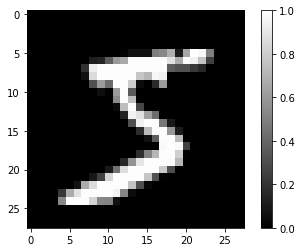

In [ ]:
import matplotlib.pyplot as plt

index = 0     #0~59999 
img, label = train_data[index]

print("정답: ", label)

plt.imshow(img.squeeze().numpy(), cmap='gray')
plt.colorbar()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class model_LeCun5_relu(nn.Module):
  def __init__(self, inplanes):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=inplanes, out_channels=6, kernel_size=5, padding = 2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5, padding = 0)
    self.conv3 = nn.Conv2d(in_channels=12, out_channels=120, kernel_size=5, padding = 0)

    self.fc1 = nn.Linear(in_features=1*120, out_features=84)
    self.fc2 = nn.Linear(in_features=84, out_features=10)

    self.softmax = nn.Softmax(dim=-1)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)

    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)

    x = F.relu(self.conv3(x))

    x = x.view(-1, 1*120)

    x = self.fc1(x)
    x = self.fc2(x)

    x = self.softmax(x)

    return x

In [ ]:
import torchvision.utils as utils

# 학습 시에 한번에 몇 개의 데이터를 볼 것인가?
batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

# 배치 볓 번마다 학습 결과를 저장할 것인가?
save_frequency = 100

In [ ]:
model_relu = model_LeCun5_relu(1)

# 최적화 함수 정의
optimizer = torch.optim.Adam(params = model_relu.parameters(), lr=0.0001)

# loss 계산 정의
criterion = nn.CrossEntropyLoss()

# loss 저장
train_losses_relu = []

# 전체 데이터를 몇 번이나 볼 것인가?
epoch_num = 10

In [ ]:
from torch.autograd import Variable

for epoch in range(epoch_num):
  # 에폭 한 번마다 전체 데이터를 보게 됨
  for batch_idx, (x, target) in enumerate(train_loader):
    optimizer.zero_grad()

    x, target = Variable(x), Variable(target)
    out = model_relu(x)

    # loss 계산
    loss = criterion(out, target)

    # 가중치 갱신을 위한 역전파
    loss.backward()

    # 가중치 갱신
    optimizer.step()

    if(batch_idx+1) % save_frequency == 0 or (batch_idx+1) == len(train_loader):
      print('==>>> epoch: {}, batch index {}, train loss: {:.6f}'.format(epoch, batch_idx+1, loss.item()))
      print("예측 5개: ", torch.argmax(out[:5], dim=1))
      print("정답 5개: ",target[:5])
      train_losses_relu.append(loss.item())

==>>> epoch: 0, batch index 100, train loss: 1.792217
예측 5개:  tensor([2, 4, 0, 3, 6])
정답 5개:  tensor([2, 4, 9, 9, 5])
==>>> epoch: 0, batch index 200, train loss: 1.766471
예측 5개:  tensor([7, 7, 2, 4, 0])
정답 5개:  tensor([7, 7, 8, 4, 0])
==>>> epoch: 0, batch index 300, train loss: 1.717412
예측 5개:  tensor([6, 9, 1, 2, 9])
정답 5개:  tensor([6, 9, 1, 8, 8])
==>>> epoch: 0, batch index 400, train loss: 1.627495
예측 5개:  tensor([8, 1, 4, 9, 8])
정답 5개:  tensor([8, 1, 4, 9, 8])
==>>> epoch: 0, batch index 500, train loss: 1.662781
예측 5개:  tensor([4, 8, 7, 3, 1])
정답 5개:  tensor([4, 5, 7, 3, 1])
==>>> epoch: 0, batch index 600, train loss: 1.683690
예측 5개:  tensor([4, 0, 0, 2, 7])
정답 5개:  tensor([4, 0, 0, 2, 7])
==>>> epoch: 1, batch index 100, train loss: 1.636617
예측 5개:  tensor([3, 7, 6, 3, 6])
정답 5개:  tensor([5, 7, 6, 3, 6])
==>>> epoch: 1, batch index 200, train loss: 1.672884
예측 5개:  tensor([0, 8, 0, 9, 6])
정답 5개:  tensor([0, 8, 0, 5, 6])
==>>> epoch: 1, batch index 300, train loss: 1.603245
예측

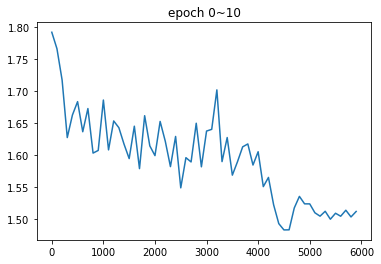

In [ ]:
import numpy as np

# 그림 1. 전체 영역을 출력
plt.figure()
plt.title("epoch 0~10")
x = np.arange(0, len(train_loader)*epoch_num, save_frequency)
plt.plot(x, train_losses_relu)
plt.show()

0~9 숫자별 확률:  tensor([[2.5366e-13, 9.9961e-01, 7.4549e-08, 1.6250e-05, 3.5213e-06, 7.5477e-06,
         1.9680e-07, 2.1162e-07, 3.4417e-04, 1.4470e-05]],
       grad_fn=<SoftmaxBackward>)
최종 예측: [1]


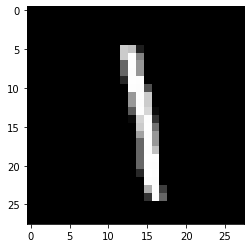

In [ ]:
index = 31
test_img, test_label = test_data[index]
plt.imshow(test_img.squeeze().numpy(), cmap='gray')

test_input_img = Variable(test_img).unsqueeze(0)

predicted_output = model_relu(test_input_img)
print("0~9 숫자별 확률: ", predicted_output)
print("최종 예측:", torch.argmax(predicted_output, dim=1).detach().numpy())